In [7]:
!pip install pandas numpy seaborn matplotlib scikit-learn --quiet

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style="whitegrid")
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [9]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [10]:
import zipfile

zip_path = "archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("data")

print("ZIP extracted to 'data/'")

ZIP extracted to 'data/'


In [ ]:
import os

for root, dirs, files in os.walk("data"):
    for file in files:
        print(os.path.join(root, file))

data/train_0irEZ2H.csv
data/test_nfaJ3J5.csv
data/sample_submission_pzljTaX.csv


In [ ]:
import os

for root, dirs, files in os.walk("data"):
    for file in files:
        print(os.path.join(root, file))

data/train_0irEZ2H.csv
data/test_nfaJ3J5.csv
data/sample_submission_pzljTaX.csv


In [ ]:
import pandas as pd

df = pd.read_csv("data/train_0irEZ2H.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [ ]:
import pandas as pd

df = pd.read_csv("data/train_0irEZ2H.csv")

categorical_fields = df.select_dtypes(include=['object', 'datetime']).columns.tolist()
numerical_fields = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("categorical.fields")
print(categorical_fields)

categorical.fields
['week']


In [ ]:
print("\nnumerical.fields")
print(numerical_fields)


numerical.fields
['record_ID', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'units_sold']


In [ ]:
print("\nmissing_values")
print(df[numerical_fields].isnull().sum())

df[numerical_fields] = df[numerical_fields].fillna(df[numerical_fields].mean())

print("\nnumerical.impute() done (mean imputation)")


missing_values
record_ID          0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

numerical.impute() done (mean imputation)


In [ ]:
import pandas as pd

df = pd.read_csv("data/train_0irEZ2H.csv")

df['key'] = df['week'].astype(str) + '_' + df['store_id'].astype(str)

df = df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price',
              'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)

df = df.groupby('key').sum()

print(df.head())
print("\nShape of final grouped dataset:", df.shape)

               units_sold
key                      
01/01/13_8023        2025
01/01/13_8058         682
01/01/13_8063         535
01/01/13_8091         210
01/01/13_8094         782

Shape of final grouped dataset: (9880, 1)


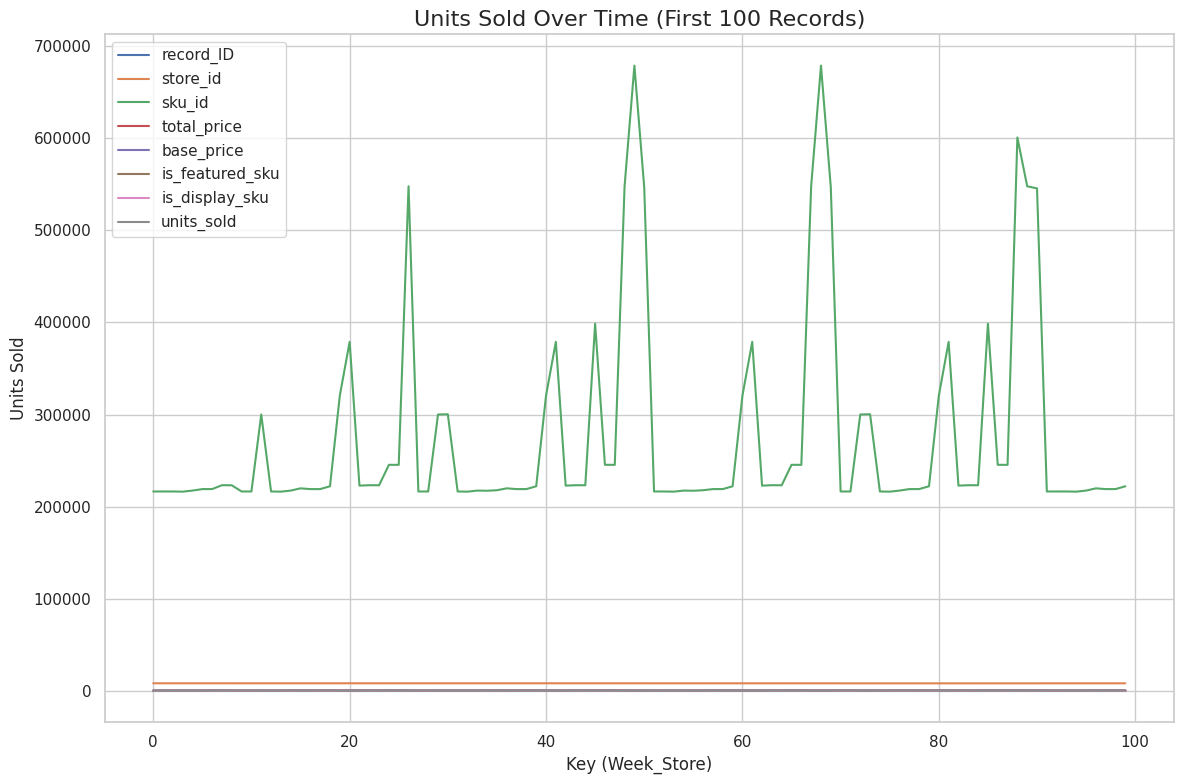

In [ ]:
import matplotlib.pyplot as plt

df[:100].plot(figsize=(12, 8))

plt.title("Units Sold Over Time (First 100 Records)", fontsize=16)
plt.xlabel("Key (Week_Store)", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df['day_1'] = df['units_sold'].shift(1)
df['day_2'] = df['units_sold'].shift(2)
df['day_3'] = df['units_sold'].shift(3)
df['day_4'] = df['units_sold'].shift(4)

df.head()

,units_sold,day_1,day_2,day_3,day_4
key,,,,,
01/01/13_8094,782,NaN,NaN,NaN,NaN
01/01/13_8095,1357,782.0,NaN,NaN,NaN
01/01/13_8121,524,1357.0,782.0,NaN,NaN
01/01/13_8218,362,524.0,1357.0,782.0,NaN
01/01/13_8222,1546,362.0,524.0,1357.0,782.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/train_0irEZ2H.csv")

df['key'] = df['week'].astype(str) + '_' + df['store_id'].astype(str)

df = df.drop(['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku'], axis=1)

df = df.groupby('key').sum()

df['day_1'] = df['units_sold'].shift(1)
df['day_2'] = df['units_sold'].shift(2)
df['day_3'] = df['units_sold'].shift(3)
df['day_4'] = df['units_sold'].shift(4)

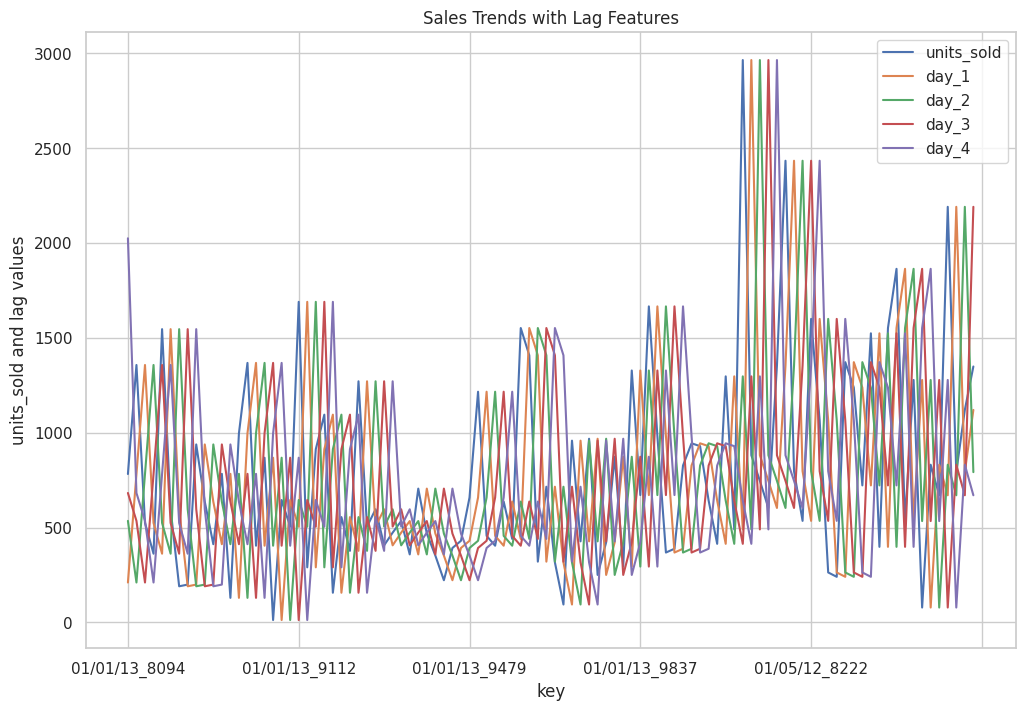

In [ ]:
df = df.dropna()

df[:100].plot(figsize=(12, 8))
plt.xlabel("key")
plt.ylabel("units_sold and lag values")
plt.title("Sales Trends with Lag Features")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

x1, x2, x3, x4, y = df['day_1'], df['day_2'], df['day_3'], df['day_4'], df['units_sold']

x1, x2, x3, x4, y = (
    np.array(x1).reshape(-1, 1),
    np.array(x2).reshape(-1, 1),
    np.array(x3).reshape(-1, 1),
    np.array(x4).reshape(-1, 1),
    np.array(y).reshape(-1, 1)
)

x = np.concatenate((x1, x2, x3, x4), axis=1)

split_percentage = 15
test_split = int(len(df) * (split_percentage / 100))

x_train, x_test = x[:-test_split], x[-test_split:]
y_train, y_test = y[:-test_split], y[-test_split:]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8395, 4)
(1481, 4)
(8395, 1)
(1481, 1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

rf_regressor.fit(x_train, y_train.ravel())

y_pred = rf_regressor.predict(x_test)

print("R Sq. Score for Random Forest Regression :", rf_regressor.score(x_test, y_test))

R Sq. Score for Random Forest Regression : 0.6585949677829166


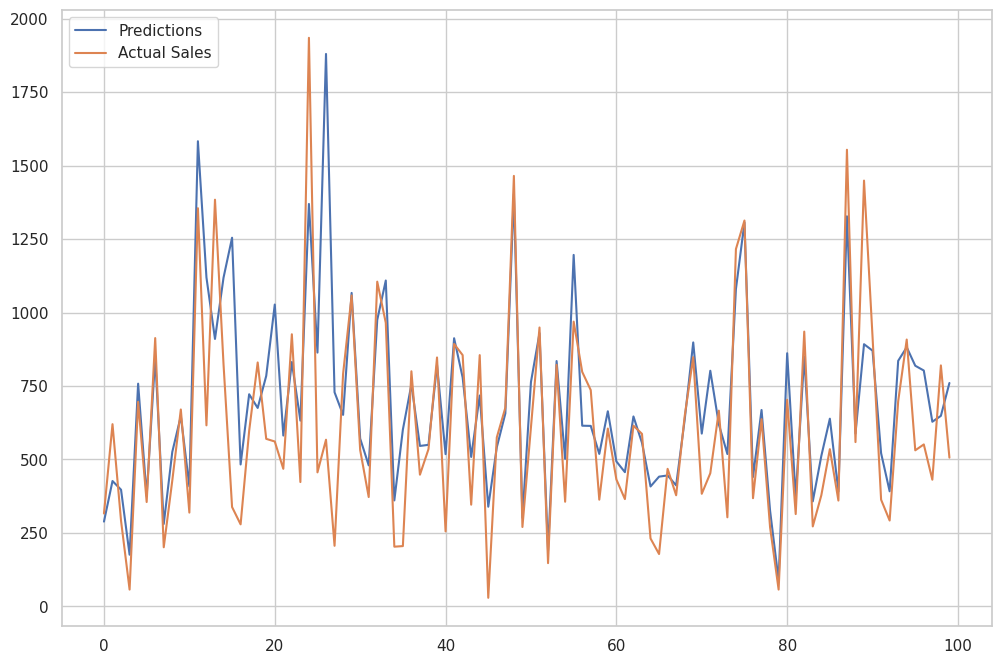

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)

plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')

plt.legend(loc='upper left')

plt.show()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor()
xgb_regressor.fit(x_train, y_train.ravel())

y_pred = xgb_regressor.predict(x_test)

print("R Sq. Score for XGBoost:", xgb_regressor.score(x_test, y_test))

R Sq. Score for XGBoost: 0.5728267431259155


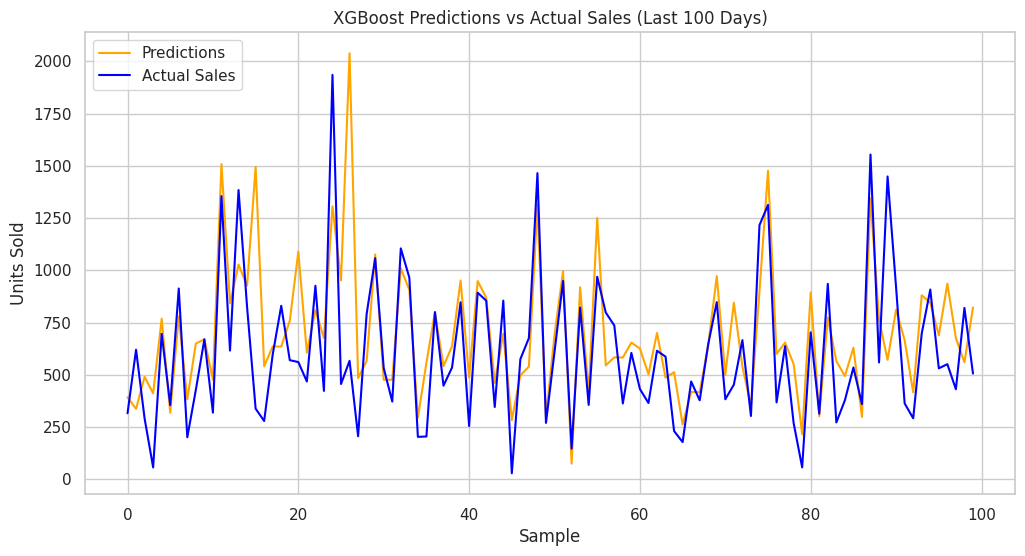

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)

plt.plot(y_pred[-100:], label='Predictions', color='orange')
plt.plot(y_test[-100:], label='Actual Sales', color='blue')

plt.legend(loc="upper left")
plt.title("XGBoost Predictions vs Actual Sales (Last 100 Days)")
plt.xlabel("Sample")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=50, stop=250, num=10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(0, 120, num=20)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [0,
               6,
               12,
               18,
               25,
               31,
               37,
               44,
               50,
               56,
               63,
               69,
               75,
               82,
               88,
               94,
               101,
               107,
               113,
               120,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 72, 94, 116, 138, 161, 183, 205, 227, 250]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=0,
    n_jobs=-1
)

rf_random.fit(x_train, y_train.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

In [ ]:
print("Best Hyperparameters:\n", rf_random.best_params_)

best_random = rf_random.best_estimator_
y_pred = best_random.predict(x_test)

r2 = best_random.score(x_test, y_test)
print("R² Score for Random Forest Regression:", r2)

n = len(y_test)
k = x_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R² Score for Random Forest Regression:", adj_r2)

Best Hyperparameters:
 {'n_estimators': 116, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 31, 'bootstrap': True}
R² Score for Random Forest Regression: 0.6536077840689125
Adjusted R² Score for Random Forest Regression: 0.6526690517764163


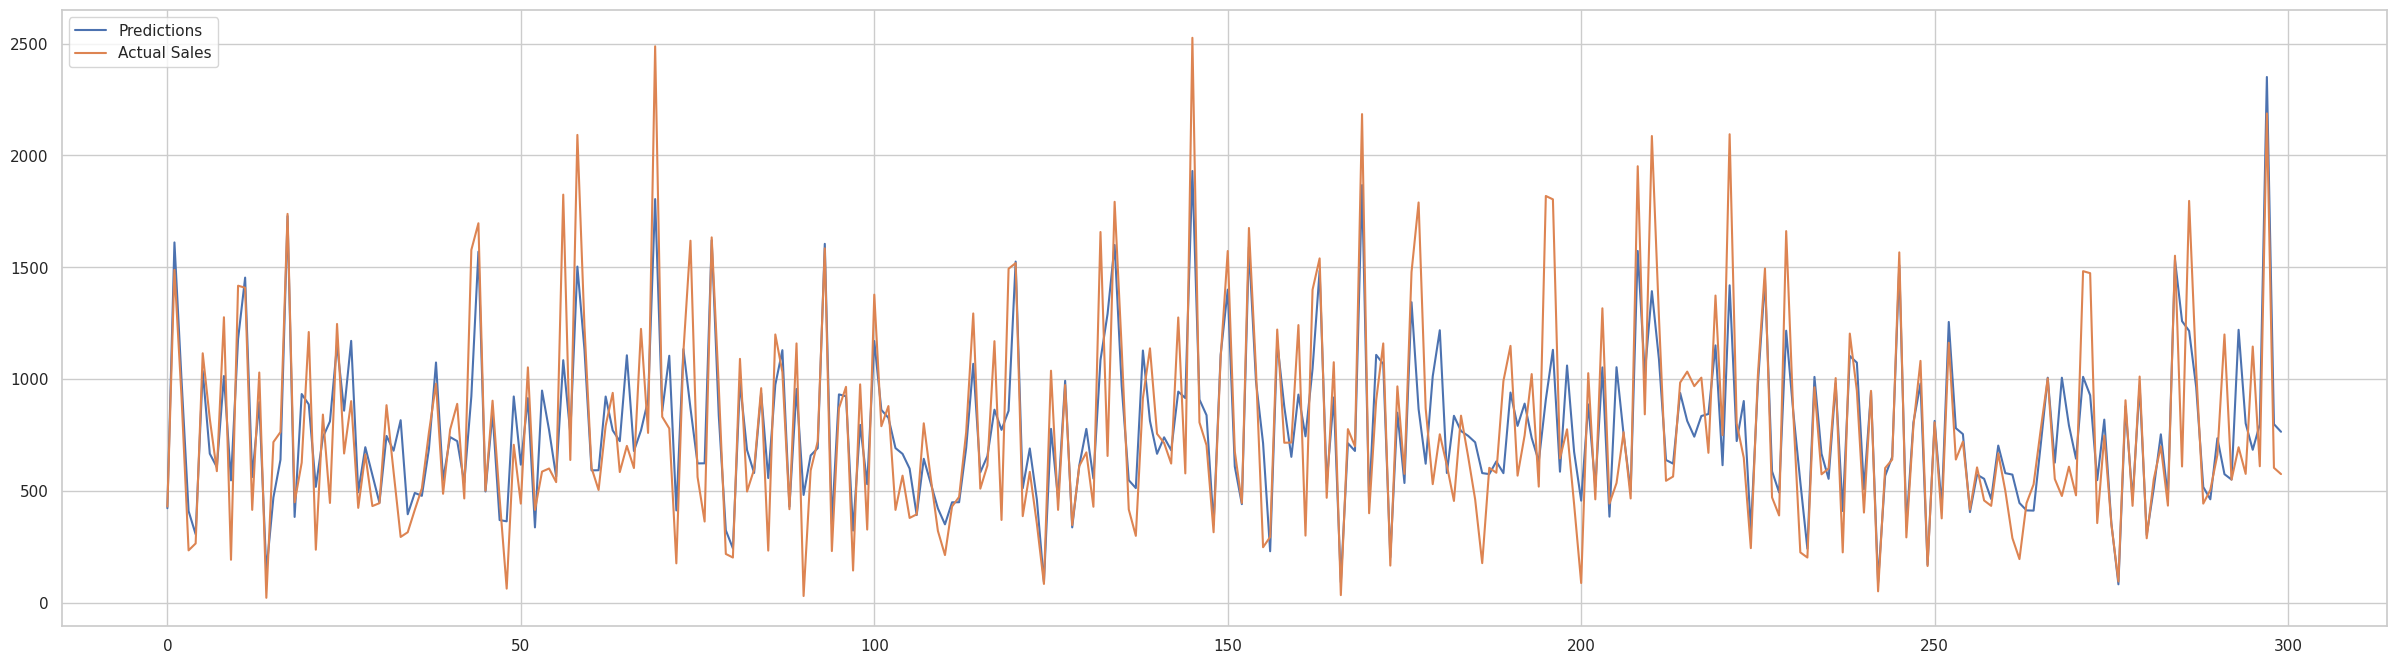

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30, 8)

plt.plot(y_pred[500:800], label='Predictions')
plt.plot(y_test[500:800], label='Actual Sales')

plt.legend(loc="upper left")

plt.savefig('final.png')

plt.show()

In [ ]:
import pickle
import numpy as np

pickle.dump(rf_regressor, open('sales_demand_forecasting.pkl', 'wb'))

features = np.array([[682.0, 535.0, 210.0, 782.0]])

print("Predicted Sales Units:", rf_regressor.predict(features)[0])

Predicted Sales Units: 511.32
